In [42]:
import Project_5_perceptron as run
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns; sns.set(color_codes=True)
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

## Perfomance of the Pocket algorithm VS Noise in the Data 
In this section, you can see how the noise in the data affects the pocket algorithm.
By modifying the "flip_y" parameter we change the proportion of noise in the data. Notice that as the noise increases the model performs worst. 
The pocket algorithm is one that compares the errors resulting from different perceptron algorithms, and return the best weights.
The perceptron algorithm works its best if the data is linearly separable

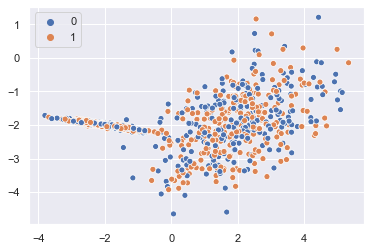

Pocket algorithm reached 52.0% accuracy for this Dataset!


In [57]:
# Generate noisy Data
X,y = make_classification(n_samples=1000, n_features=2,  n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1,class_sep=2,flip_y=1,weights=[0.5,0.5])
Y = [2 * np.sum(i) -1  for i in y]
sns.scatterplot(X[:,0],X[:,1],hue=y);
#ax2.set_title("With Noise");
plt.show();

#w = np.random.randn(3)
w_new = run.pocket(50,X,Y,3,500)
print("Pocket algorithm reached {}% accuracy for this Dataset!".format(100*round(1-run.error(w_new,X,Y),2)))      
      

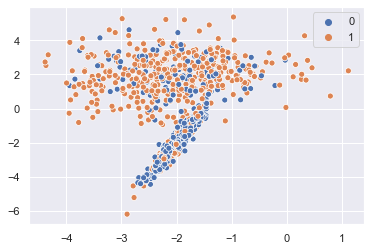

Pocket algorithm reached 75.0% accuracy for this Dataset!


In [58]:
# Generate noisy Data
X,y = make_classification(n_samples=1000, n_features=2,  n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1,class_sep=2,flip_y=0.5,weights=[0.5,0.5])
Y = [2 * np.sum(i) -1  for i in y]
sns.scatterplot(X[:,0],X[:,1],hue=y);
#ax2.set_title("With Noise");
plt.show();

#w = np.random.randn(3)
w_new = run.pocket(50,X,Y,3,500)
print("Pocket algorithm reached {}% accuracy for this Dataset!".format(100*round(1-run.error(w_new,X,Y),2)))      
      

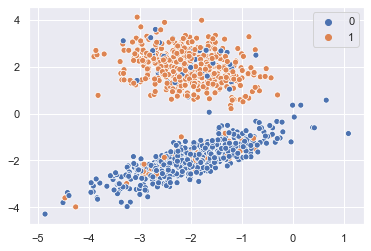

Pocket algorithm reached 91.0% accuracy for this Dataset!


In [59]:
# Generate noisy Data
X,y = make_classification(n_samples=1000, n_features=2,  n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1,class_sep=2,flip_y=0.2,weights=[0.5,0.5])
Y = [2 * np.sum(i) -1  for i in y]
sns.scatterplot(X[:,0],X[:,1],hue=y);
#ax2.set_title("With Noise");
plt.show();

#w = np.random.randn(3)
w_new = run.pocket(50,X,Y,3,500)
print("Pocket algorithm reached {}% accuracy for this Dataset!".format(100*round(1-run.error(w_new,X,Y),2)))      
      

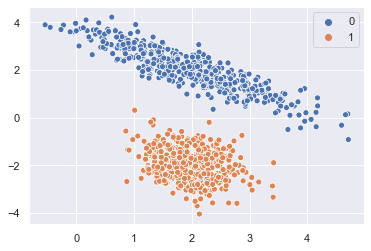

Pocket algorithm reached 100.0% accuracy for this Dataset!


In [60]:
# Generate noisy Data
X,y = make_classification(n_samples=1000, n_features=2,  n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1,class_sep=2,flip_y=0,weights=[0.5,0.5])
Y = [2 * np.sum(i) -1  for i in y]
sns.scatterplot(X[:,0],X[:,1],hue=y);
#ax2.set_title("With Noise");
plt.show();

#w = np.random.randn(3)
w_new = run.pocket(50,X,Y,3,500)
print("Pocket algorithm reached {}% accuracy for this Dataset!".format(100*round(1-run.error(w_new,X,Y),2)))      
      

# ConocoPhillips Challenge

**This data was provided by ConocoPhillips during the TAMU Datathon 2019:**
https://2019.tamudatathon.com/challenges

download data here :https://www.kaggle.com/c/equipfails/data

**What I learned during this competition!!**

To have models that predict with great skill is necessary. Nevertheless, the most important thing is how we take a tool and use it to find real world solutions. For instance: "How can we predict when equipment will fail and use this info to drive down ConocoPhillip's costs?"

**Description**

As with all mechanical equipment, things break and when things break money is lost in the form of repairs and lost oil production. When costs go up cash goes down, but how can we predict when equipment will fail and use this information to drive down our costs?

**Input Data**

A data set is provided that has documented failure events that occurred on surface equipment and down-hole equipment. For each failure event, data has been collected from over 107 sensors that collect a variety of physical information both on the surface and below the ground.

**Challenge Questions**

Predict surface and down-hole failures using the data set provided.


**Data Wrangling**
* Columns with more than 20% of the data missing were removed from the dataset.
* The remaining rows containing missing values were removed.
* All data was transformed into its actual data type.

In [61]:
equip = pd.read_csv('/Users/elda/Documents/TAMU/equipfails/equipfails/equip_failures_training_set.csv', index_col = 'id')

# Dropping Columns and rows
missing = (equip.replace('na',np.nan).isna().sum().values/60000) * 100
percent_missing = pd.Series(missing.round(2), index = equip.columns) 
drop_20upmissing = percent_missing[percent_missing > 20].index # what percentage of nas per column
drop_20upmissing.shape

equip = equip.replace('na',np.nan)
equip = equip.drop(drop_20upmissing, axis = 1)
equip = equip.dropna(axis =0)

target = equip['target']
equip = equip.drop('target', axis = 1)
baseline_data = equip
baseline_data.shape

# Transforming object column types to float column
floats = baseline_data.select_dtypes(object).apply(pd.to_numeric,downcast = 'float') 
baseline_data[floats.columns] = floats.values

In [67]:
# Splitting data Into train and test sets.
X_train, X_valid, y_train, y_valid = train_test_split(baseline_data,target, 
                                                                train_size=0.8, test_size=0.2,
                                                                random_state=0)
x_train = X_train.values
# transforming classes (0,1) to (-1,1)
y = [2 * np.sum(i) -1  for i in y_train]

In [70]:
w_new = run.pocket(50,x_train,y,147,500)
print("Pocket algorithm reached {}% accuracy for this Dataset!".format(100*round(1-run.error(w_new,x_train,y),2)))      
      

Pocket algorithm reached 99.0% accuracy for this Dataset!


In [71]:
x_valid = X_valid.values
y = [2 * np.sum(i) -1  for i in y_valid]
print("Pocket algorithm reached {}% accuracy for Validation Dataset!".format(100*round(1-run.error(w_new,x_valid,y),2)))  

Pocket algorithm reached 99.0% accuracy for Validation Dataset!


In [73]:
# saving best weights
np.savetxt("ConocoPhillips_weights.csv", w_new, delimiter=",")

### Conclusion

A simple model was able to perform with with 99.0% accuracy.

See the functions used here :

https://github.com/EldaPiedade/FINAL_PROJECTS_DATA4319_ELDA-PIEDADE/blob/master/PROJECT_5_PERCEPTRON/Project_5_perceptron.py